# Using an ARIMA model to fit and evaluate Labor Force Participation Rate in Singapore

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA

from matplotlib.pylab import rcParams
from scipy.stats import norm

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [80]:
lfpr=pd.read_csv('singapore-lfpr.csv',header=0,names=['Date','Participation Rate'])

In [81]:
lfpr.count()

Date                  28
Participation Rate    28
dtype: int64

In [82]:
lfpr=pd.Series(lfpr['Participation Rate'].values,index=pd.date_range('31/12/1980',periods=28,freq='A-DEC'))

We are converting the pandas dataframe into a date time series so that we will be able to check for stationarity as well as fit an ARIMA model

In [22]:
lfpr.head()

1980-12-31    70.199997
1981-12-31    71.099998
1982-12-31    71.699997
1983-12-31    72.300003
1984-12-31    73.099998
Freq: A-DEC, dtype: float64

In [11]:
def stationarity_test(timeseries):
    from statsmodels.tsa.stattools import adfuller
    df_test=adfuller(timeseries,autolag='AIC')
    df_output=pd.Series(df_test[0:4],
                       index=['Test Statistic','p-value','Lags Used','Number of Observations'])
    
    print(df_output)

Above function checks for stationarity by running an Augmented Dicky Fuller test on the data. We want to see a p value less than .05 to confirm stationarity

In [83]:
#lfpr_diff=lfpr-lfpr.shift(1)

In [84]:
#lfpr_diff=lfpr_diff.dropna(inplace=False)

In [86]:
stationarity_test(lfpr)

Test Statistic            -2.181088
p-value                    0.213181
Lags Used                  1.000000
Number of Observations    26.000000
dtype: float64


P value turns out to be .21 and so we reject the null hypothesis that the data is stationary. There must be a trend in the data. We can plot the data to verify as well

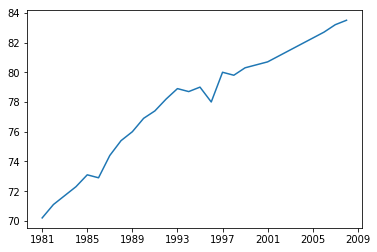

In [24]:
plt.plot(lfpr)

Not surprisingly, we can see there is a trend in the Labor Force Participation Rate. We will utilimately have to difference the data to produce a stationary dataset.

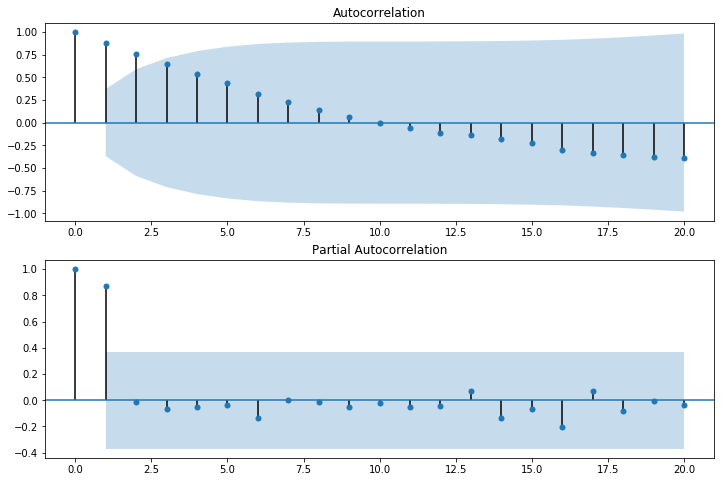

In [25]:
fig=plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig=plot_acf(lfpr,lags=20,ax=ax1)
ax2=fig.add_subplot(212)
fig=plot_pacf(lfpr,lags=20,ax=ax2)

Above charts show the autocorrelation and the partial autocorrelation of the time series data. The partial autocorrelation shouws positive correlation up until 1 lag. Autocorrelation shows positive correlation up until about 2.5 lags. We should consider using a p parameter of 1 and a q parameter of 0 to start

In [90]:
model=ARIMA(lfpr,order=(1,1,0))
results=model.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


In [91]:
results.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                   27
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 -20.049
Method:                       css-mle   S.D. of innovations              0.507
Date:                Thu, 07 Mar 2019   AIC                             46.098
Time:                        15:23:42   BIC                             49.985
Sample:                    12-31-1981   HQIC                            47.254
                         - 12-31-2007                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4904      0.072      6.811      0.000       0.349       0.632
ar.L1.D.y     -0.3690      0.176     -2.094      0.047      -0.714      -0.024
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.7097           +0.0000j            2.7097            0.5000
-----------------------------------------------------------------------------
"""

We run the ARIMA (1,1,0) model and see the results. We note the AIC of 46.09 but will verify it's goodnews of fit when running a few different models.

In [33]:
model2=ARIMA(lfpr,order=(1,1,1))
results2=model2.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


In [35]:
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                   27
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -19.855
Method:                       css-mle   S.D. of innovations              0.503
Date:                Thu, 07 Mar 2019   AIC                             47.710
Time:                        14:33:16   BIC                             52.893
Sample:                    12-31-1981   HQIC                            49.251
                         - 12-31-2007                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4911      0.076      6.424      0.000       0.341       0.641
ar.L1.D.y     -0.5699      0.301     -1.896      0.070      -1.159       0.019
ma.L1.D.y      0.2308      0.340      0.679      0.504      -0.436       0.898
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.7548           +0.0000j            1.7548            0.5000
MA.1           -4.3320           +0.0000j            4.3320            0.5000
-----------------------------------------------------------------------------
"""

When we run an ARIMA (1,1,1) model we see AIC fall to 47.10 indicating a worse fitting time series model for the data

In [63]:
model3=ARIMA(lfpr,order=(1,2,1))
results3=model3.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


In [64]:
results3.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                   D2.y   No. Observations:                   26
Model:                 ARIMA(1, 2, 1)   Log Likelihood                 -19.825
Method:                       css-mle   S.D. of innovations              0.479
Date:                Thu, 07 Mar 2019   AIC                             47.650
Time:                        15:07:28   BIC                             52.682
Sample:                    12-31-1982   HQIC                            49.099
                         - 12-31-2007                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0179      0.009     -2.089      0.048      -0.035      -0.001
ar.L1.D2.y    -0.4257      0.171     -2.483      0.021      -0.762      -0.090
ma.L1.D2.y    -1.0000      0.131     -7.661      0.000      -1.256      -0.744
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.3489           +0.0000j            2.3489            0.5000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

We also try differencing the data twice to see how the model behaves. AIC of 47.65 is slightly lower than the 47.7 oringally in ARIMA (1,1,1). We will evalute the residuals

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


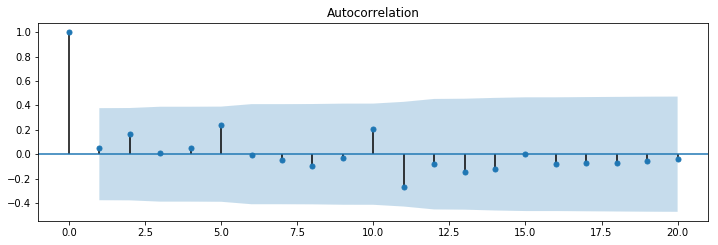

In [92]:
fig=plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig=plot_acf(results.resid,lags=20,ax=ax1)

When we check for autocorrelation in the error terms of the ARIMA (1,1,0) model, we see there is no autocorrelation in the error terms still. This is a good sign.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


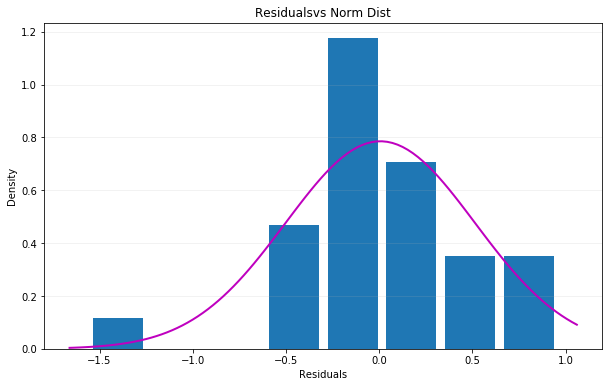

In [89]:
from scipy.stats import norm

plt.figure(figsize=(10,6))
plt.hist(results.resid,bins='auto',density=True,rwidth=.85,
        label='Residuals')

mu, std=norm.fit(results.resid)

xmin,xmax=plt.xlim()

x=np.linspace(xmin,xmax,100)
p=norm.pdf(x,mu,std)

plt.plot(x,p,'m',linewidth=2)
plt.grid(axis='y',alpha=.2)
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.title('Residualsvs Norm Dist')
plt.show()

We can plot the distribution of the error terms to see if they are random or if there is trend left in the data. We can see above the historgram is not perfectly normal, but when we check for mean of zero below, we see the mean at .005, very close to zero. It is likely that this model will suffice, albeit, the distribution looks not perfectly normal. We should keep the ARIMA (1,1,0) model since it has the best AIC and error terms close to normally distribution.

In [94]:
results.resid.mean()

0.005598592431997492

In [95]:
results.resid.std()

0.517551164072559